![BTS](https://github.com/vfp1/bts-mbds-data-science-foundations-2019/blob/master/sessions/img/Logo-BTS.jpg?raw=1)

# WEEK 2: Assignements

### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Data Science Foundations (2019-10-10)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-mbds-data-science-foundations-2019/blob/master/sessions/DSF_WEEK_2_EXERCISES.ipynb)

# Exercise 1: getting around GIT [OPTIONAL]

You will be provided with further slides on next Tuesday class (15/10/2019). Meanwhile you can try to do the following:

* Create a GitHub account
* Fork the [repository](https://github.com/vfp1/bts-mbds-data-science-foundations-2019) from the course
* Clone the repository in your own computer using `git clone`
* Create a folder within `/sessions` where you will be creating your own notebooks. Since we are using notebooks, it is better that you leave the nootebooks from the course untouched, and that you rather create a copy of them in the  `/sessions` folder where you can edit them. Trust me, it will save you a lot of **merge conflict** problems.
* Sync your fork to the remote origin (the original repo of the course) so you can update it with the new notebooks that I will be adding. Follow [this tutorial](https://help.github.com/en/articles/syncing-a-fork).
* Return this exercise by commiting the whole notebook in your own git and pass the url to me

# Exercise 2: more bikes [OBLIGATORY]

Given [this](https://github.com/vfp1/bts-mbds-data-science-foundations-2019/raw/master/sessions/data/Fremont_Bridge_Hourly_Bicycle_Counts_by_Month_October_2012_to_present.csv) dataset:

* Open the dataset using Pandas
* Display the DataFrame
* Describe the DataFrame, can we already see some trends in regards to volume of bikes per region?
* Reply to the following questions (either by plotting the graph and summarizing the values):

    * In each one of the years from the dataset. Which is the month with the highest number of bikes?
        * Plot each year with the number of bikes to also see it visually.
    * In Total, when are the hours with the least amount of riders? Take into consideration all days of the week.
        * Plot the hours with the average amount of riders.
    * In the current year, which is the best route to bike with less people? Use the average of bikers during the whole year.
        * Plot the bikers per hour using yearly average
        * When is best to ride with less people between 10 to 15 in weekdays using the average of 2019?
        * Plot the amount of bikers during those hours on weekdays

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
%matplotlib inline

In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/vfp1/bts-mbds-data-science-foundations-2019/master/sessions/data/Fremont_Bridge_Hourly_Bicycle_Counts_by_Month_October_2012_to_present.csv',index_col='Date',parse_dates=['Date'])
df.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2015-02-24 02:00:00,3.0,3.0
2019-01-01 00:00:00,0.0,9.0
2019-01-01 01:00:00,2.0,22.0
2016-02-15 00:00:00,3.0,3.0
2019-01-01 02:00:00,1.0,11.0


In [5]:
df.columns=['East','West']
df['Total']=df.East+df.West
df.head()

,East,West,Total
Date,,,
2015-02-24 02:00:00,3.0,3.0,6.0
2019-01-01 00:00:00,0.0,9.0,9.0
2019-01-01 01:00:00,2.0,22.0,24.0
2016-02-15 00:00:00,3.0,3.0,6.0
2019-01-01 02:00:00,1.0,11.0,12.0


* Describe the DataFrame, can we already see some trends in regards to volume of bikes per region?


In [6]:
df.describe().round(2)

,East,West,Total
count,61287.00,61287.00,61287.00
mean,52.89,61.44,114.34
std,67.82,89.88,145.21
min,0.00,0.00,0.00
25%,7.00,7.00,15.00
50%,29.00,30.00,62.00
75%,71.00,74.00,150.00
max,698.00,850.00,1097.00


We can see that West has a higher mean of bikes per hour, also a better maximun and higer values at percentiles 50%&75%

 --In each one of the years from the dataset. Which is the month with the highest number of bikes?
        * Plot each year with the number of bikes to also see it visually.


In [7]:
df1=df.copy()
df1['Month']=df1.index.month
df1=df1.groupby([df1.index.year,df1.Month]).mean().sort_values(by=['Date','Total'],ascending=False)
df1.head()

East        West       Total
Date Month                                   
2019 8      70.483871  120.932796  191.416667
     7      71.459677  113.639785  185.099462
     6      72.188889  111.855556  184.044444
     5      69.272849  104.279570  173.552419
     9      57.568056   98.229167  155.797222

In [8]:
maxmonth=df1.loc[df1.groupby("Date")["Total"].idxmax()]
maxmonth

,,East,West,Total
Date,Month,,,
2012,10,48.511494,45.877874,94.389368
2013,7,80.662634,77.904570,158.567204
2014,7,82.217742,79.971774,162.189516
2015,6,79.272222,78.668056,157.940278
2016,5,76.068548,77.370968,153.439516
2017,8,66.891129,94.651882,161.543011
2018,5,72.836022,101.643817,174.479839
2019,8,70.483871,120.932796,191.416667


Text(0.5, 0, 'Year,MaxMonth')

Text(0, 0.5, 'Bikers')

Text(0.5, 1.0, 'Bikers en every Max Month')

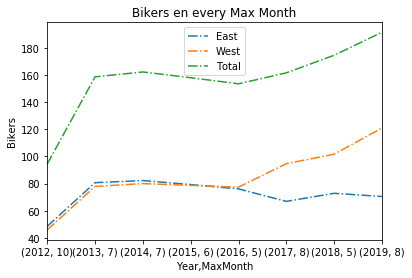

In [17]:
maxmonth.plot.line(linestyle='-.')
plt.xlabel('Year,MaxMonth')
plt.ylabel('Bikers')
plt.title('Bikers en every Max Month')
plt.show()

 --In Total, when are the hours with the least amount of riders? Take into consideration all days of the week.
        * Plot the hours with the average amount of riders.


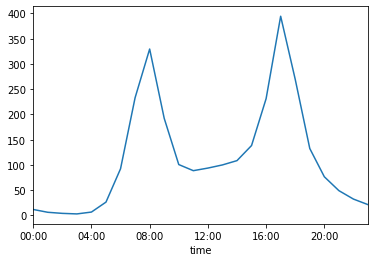

In [18]:
hourly_ticks=4*60*60*np.arange(6)
hour=df.groupby(df.index.time).Total.mean().sort_values(ascending=True).plot(xticks=hourly_ticks)


* In the current year, which is the best route to bike with less people? Use the average of bikers during the whole year.
        * Plot the bikers per hour using yearly average
        * When is best to ride with less people between 10 to 15 in weekdays using the average of 2019?
        * Plot the amount of bikers during those hours on weekdays

In [19]:
df2=df.copy()
df2['Year']=df2.index.year
year_h=df2.groupby([df2.Year,df2.index.time]).mean()
year_h.head()

East      West     Total
Year                                       
2012 00:00:00  4.500000  4.966667  9.466667
     01:00:00  2.922222  2.722222  5.644444
     02:00:00  2.722222  1.888889  4.611111
     03:00:00  1.211111  1.666667  2.877778
     04:00:00  3.711111  2.088889  5.800000

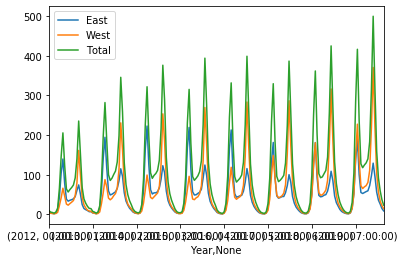

In [102]:
year_h.plot()

* When is best to ride with less people between 10 to 15 in weekdays using the average of 2019?

In [20]:
df3=df.copy()
df3['Year']=df3.index.year
df3['Hour']=df3.index.time
df3['Day']=df3.index.weekday
df3=df3[df3.Year==2019]
df3=df3[df3.Day.isin(range(5))]
df3=df3.between_time('10:00:00','15:00:00')
df3=df3.groupby(df3.index.time)['East','West','Total'].mean().sort_values(by='Total',ascending=True)
df3.round(2)

,East,West,Total
11:00:00,43.79,53.53,97.32
12:00:00,44.02,56.01,100.03
13:00:00,45.81,59.26,105.07
14:00:00,46.97,70.64,117.61
10:00:00,53.24,72.37,125.61
15:00:00,65.83,113.39,179.22


 * Plot the amount of bikers during those hours on weekdays

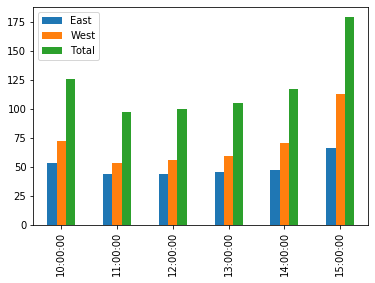

In [21]:
df3.sort_index(ascending=True).plot.bar()

# Exercise 3: SQLite and Pandas [OBLIGATORY]

Download [this Sqlite database](https://github.com/vfp1/bts-mbds-data-science-foundations-2019/raw/master/sessions/data/flights.db)

You can either use SQLite database entirely or load the SQL query in Pandas to reply to the following questions:

*   Which is the highest city that as an airport?
*   And which is the lowest city that as an airport?
*   Retrieve the timezones and generate a dataframe with the timezones and the amount of airports in them. Plot it as a histogram as well.
*   Which country has more airlines? And which one has less?
*   Which city has the most outgoing destinations? And the least?
*   And which city has the most incoming destinations? And the least?



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3



In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
%matplotlib inline

In [6]:
def create_connect_database(db_name):
    connection=sqlite3.connect(db_name)
    cursor=connection.cursor
    return connection,cursor

def commit_close(connection,c,close_connection=True):
    connection.commit()
    if close_connection is True:
        c.close()
        connection.close()
    elif close_connection is False:
        pass

In [11]:
connection, cursor=create_connect_database('flights(1).db')


*   Which is the highest city that as an airport?

In [27]:
query="""SELECT city,altitude
FROM airports
ORDER BY altitude DESC;"""

df=pd.read_sql_query(query,connection)
df['altitude']=df['altitude'].astype(int)
df.sort_values(by='altitude',ascending=False).head()

,city,altitude
6108,Daocheng,14472
6149,Bangda,14219
6192,Kangding,14042
6274,Shiquanhe,13780
6334,Irkutsk,13411


*   And which is the lowest city that as an airport?


In [29]:
query="""SELECT city, CAST (airports.altitude as INTEGER) AS high 
FROM airports
ORDER BY high ASC"""

df=pd.read_sql_query(query,connection)

df.head(10)

,city,high
0,Metzada,-1266
1,Eyn-yahav,-164
2,Ramsar,-70
3,Astrakhan,-65
4,Noshahr,-61
5,Imperial,-54
6,El Centro,-42
7,Rasht,-40
8,Gorgan,-24
9,Rotterdam,-15


*   Retrieve the timezones and generate a dataframe with the timezones and the amount of airports in them. Plot it as a histogram as well.


In [51]:
query="""SELECT timezone,COUNT(name)
FROM airports
GROUP BY timezone
ORDER BY COUNT(name) DESC;"""

df=pd.read_sql_query(query,connection)
df=df.set_index('timezone').sort_index(ascending=True)


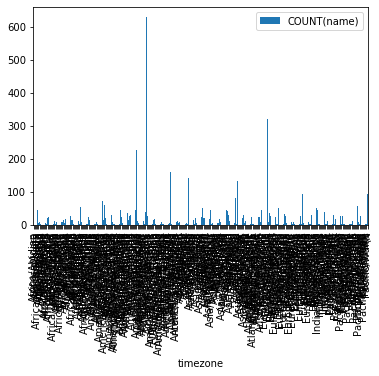

In [52]:
df.plot.bar()


*   Which country has more airlines? And which one has less?


In [53]:
query="""SELECT country, COUNT(name)
FROM airlines
WHERE active='Y'
GROUP BY country
ORDER BY COUNT(name) DESC;"""

df=pd.read_sql_query(query,connection)
df.head()

,country,COUNT(name)
0,United States,141
1,Russia,72
2,United Kingdom,40
3,Germany,37
4,Canada,34


In [54]:
query="""SELECT country, COUNT(name)
FROM airlines
WHERE active='Y'
GROUP BY country
ORDER BY COUNT(name) ASC;"""

df=pd.read_sql_query(query,connection)
df.head()

,country,COUNT(name)
0,S.A.,1
1,ALASKA,1
2,AVIANCA,1
3,American Samoa,1
4,Antigua and Barbuda,1


*   Which city has the most outgoing destinations? And the least?


In [55]:
query="""SELECT CAST(airports.city AS TEXT) AS ciudad, COUNT(source)
FROM routes
INNER JOIN airports ON airports.code=routes.source
GROUP BY ciudad
ORDER BY COUNT(source) DESC;"""

df=pd.read_sql_query(query,connection)
df.head()

,ciudad,COUNT(source)
0,London,1232
1,Atlanta,915
2,Paris,725
3,Chicago,697
4,Shanghai,616


In [58]:
df.sort_values(by="COUNT(source)",ascending=True).head()

,ciudad,COUNT(source)
3147,Abu Simbel,1
2753,Pellston,1
2752,Pendleton,1
2751,Pentecost Island,1
2750,Penticton,1


*   And which city has the most incoming destinations? And the least?

In [59]:
query="""SELECT CAST(airports.city AS TEXT) AS ciudad, COUNT(dest)
FROM routes
INNER JOIN airports ON airports.code=routes.dest
GROUP BY ciudad
ORDER BY COUNT(source) DESC;"""

df=pd.read_sql_query(query,connection)
df.head()

,ciudad,COUNT(dest)
0,London,1224
1,Atlanta,911
2,Paris,720
3,Chicago,682
4,Shanghai,620


In [60]:
df.sort_values(by="COUNT(dest)",ascending=True).head()

,ciudad,COUNT(dest)
3151,Abu Simbel,1
2756,Peawanuck,1
2755,Pelican,1
2754,Pellston,1
2753,Pendleton,1
